In [479]:
import pandas as pd
import numpy as np 
import seaborn as sns
%matplotlib inline

In [480]:
df=pd.read_csv('Social_Network_Ads.csv')

In [481]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [482]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [483]:
df.duplicated().sum()

0

In [484]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [485]:
df['User ID'].nunique()

400

In [486]:
df.drop('User ID',axis=1,inplace=True)

In [487]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [488]:
df['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

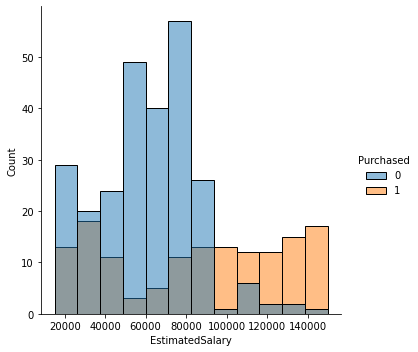

In [568]:
sns.displot(data=df,x='EstimatedSalary',hue='Purchased')

<AxesSubplot:xlabel='Gender', ylabel='count'>

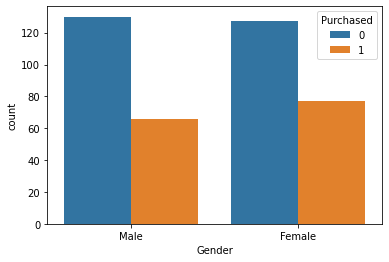

In [489]:
sns.countplot(data=df,x='Gender',hue='Purchased')

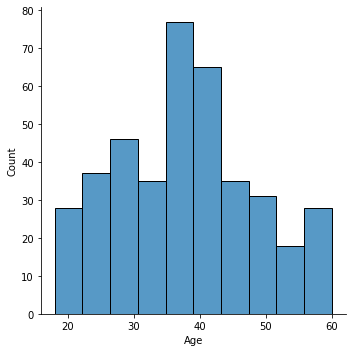

In [490]:
sns.displot(data=df,x='Age')

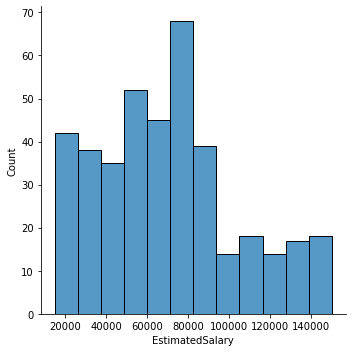

In [491]:
sns.displot(data=df,x='EstimatedSalary')

In [492]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [493]:
from datasist.structdata import detect_outliers

In [494]:
detect_outliers(df,0,['EstimatedSalary','Age'])
## no outliers

[]

In [495]:
from sklearn.preprocessing import OneHotEncoder

In [496]:
encoder=OneHotEncoder(sparse=False,drop='first')

In [497]:
encoded_=encoder.fit_transform(df[['Gender']])
encoded_

array([[1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],

In [498]:
df_encoded=pd.DataFrame(encoded_,columns=encoder.get_feature_names_out())

In [499]:
df=pd.concat([df,df_encoded],axis=1)

In [500]:
df.drop('Gender',axis=1,inplace=True)

In [501]:
df

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1.0
1,35,20000,0,1.0
2,26,43000,0,0.0
3,27,57000,0,0.0
4,19,76000,0,1.0
...,...,...,...,...
395,46,41000,1,0.0
396,51,23000,1,1.0
397,50,20000,1,0.0
398,36,33000,0,1.0


In [502]:
from sklearn.model_selection import train_test_split

In [503]:
x=df.drop('Purchased',axis=1)
y=df['Purchased']

In [504]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10,stratify=y)

In [505]:
x_train

,Age,EstimatedSalary,Gender_Male
71,24,27000,0.0
68,22,63000,0.0
104,19,21000,0.0
219,59,143000,1.0
49,31,89000,0.0
...,...,...,...
269,40,61000,1.0
327,42,75000,0.0
74,32,18000,1.0
99,28,37000,0.0


In [506]:
df

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1.0
1,35,20000,0,1.0
2,26,43000,0,0.0
3,27,57000,0,0.0
4,19,76000,0,1.0
...,...,...,...,...
395,46,41000,1,0.0
396,51,23000,1,1.0
397,50,20000,1,0.0
398,36,33000,0,1.0


In [507]:
from imblearn.under_sampling import RandomUnderSampler

In [508]:
sm=RandomUnderSampler()

In [509]:
x_train,y_train=sm.fit_resample(x_train,y_train)

In [510]:
x_train

,Age,EstimatedSalary,Gender_Male
0,27,84000,0.0
1,22,27000,0.0
2,28,32000,1.0
3,27,88000,1.0
4,30,79000,0.0
...,...,...,...
223,32,117000,0.0
224,39,75000,0.0
225,47,50000,0.0
226,46,117000,1.0


In [511]:
from sklearn.preprocessing import StandardScaler

In [512]:
scaler=StandardScaler()

In [513]:
columns_to_be_scaled=['Age','EstimatedSalary']

In [514]:
x_train[columns_to_be_scaled]=scaler.fit_transform(x_train[columns_to_be_scaled])

In [515]:
x_test[columns_to_be_scaled]=scaler.transform(x_test[columns_to_be_scaled])

In [516]:
x_train

,Age,EstimatedSalary,Gender_Male
0,-1.136808,0.294468,0.0
1,-1.608925,-1.278449,0.0
2,-1.042385,-1.140474,1.0
3,-1.136808,0.404848,1.0
4,-0.853538,0.156493,0.0
...,...,...,...
223,-0.664691,1.205105,0.0
224,-0.003727,0.046113,0.0
225,0.751660,-0.643763,0.0
226,0.657237,1.205105,1.0


In [517]:
from sklearn.linear_model import LogisticRegression

In [518]:
model=LogisticRegression()

In [519]:
model.fit(x_train,y_train)

LogisticRegression()

In [520]:
train_pred=model.predict(x_train)
test_pred=model.predict(x_test)

In [521]:
from sklearn.metrics import accuracy_score

In [522]:
print('train accuracy:',accuracy_score(y_train,train_pred)*100)
print('test accuracy:',accuracy_score(y_test,test_pred)*100)

train accuracy: 85.08771929824562
test accuracy: 92.5


## testing instaint

In [524]:
df

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1.0
1,35,20000,0,1.0
2,26,43000,0,0.0
3,27,57000,0,0.0
4,19,76000,0,1.0
...,...,...,...,...
395,46,41000,1,0.0
396,51,23000,1,1.0
397,50,20000,1,0.0
398,36,33000,0,1.0


In [526]:
x_train

,Age,EstimatedSalary,Gender_Male
0,-1.136808,0.294468,0.0
1,-1.608925,-1.278449,0.0
2,-1.042385,-1.140474,1.0
3,-1.136808,0.404848,1.0
4,-0.853538,0.156493,0.0
...,...,...,...
223,-0.664691,1.205105,0.0
224,-0.003727,0.046113,0.0
225,0.751660,-0.643763,0.0
226,0.657237,1.205105,1.0


In [559]:
inst=[55,30000,'Female']

In [560]:
inst[0:2]

[55, 30000]

In [561]:
scalingg=scaler.transform([inst[0:2]])

C:\Users\ymahm\.conda\envs\Epsilon_mahmoud\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [562]:
en=encoder.transform([[inst[-1]]])
en

C:\Users\ymahm\.conda\envs\Epsilon_mahmoud\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[0.]])

In [564]:
scalingg

array([[ 1.50704704, -1.19566433]])

In [565]:
te_ints=np.append(scalingg,en)

In [566]:
model.predict([te_ints])

C:\Users\ymahm\.conda\envs\Epsilon_mahmoud\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)